In [10]:
import numpy as np 
import pandas as pd 
import os
for dirname, _, filenames in os.walk('C:\Datos\Logistica\framingham'):
for filename in filenames:
print(os.path.join(dirname, filename))


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import countplot
from sklearn import preprocessing, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [16]:
df = pd.read_csv(r"C:\Datos\Logistica\framingham.csv")
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [54]:

df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [55]:
df1 = df.drop('education', axis=1)

In [19]:
df1.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [20]:
df1.dropna(inplace=True)

In [21]:
df1.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

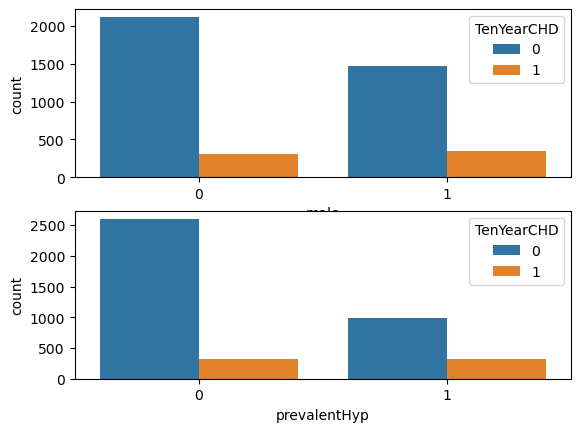

In [39]:
fig, ax = plt.subplots(2)
sns.countplot(x='male',hue='TenYearCHD',data=df, ax=ax[0])
sns.countplot(x='prevalentHyp',hue='TenYearCHD', data=df, ax=ax[1])
plt.show()

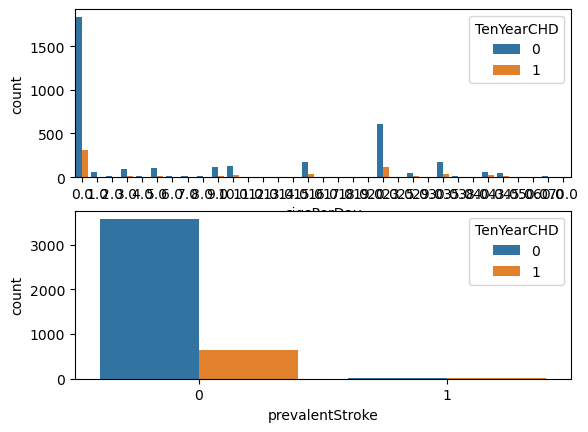

In [37]:
fig, ax = plt.subplots(2)
sns.countplot(x='cigsPerDay',hue='TenYearCHD',data=df, ax=ax[0])
sns.countplot(x='prevalentStroke',hue='TenYearCHD', data=df, ax=ax[1])
plt.show()

In [42]:
X = df1[["male","prevalentHyp","currentSmoker","cigsPerDay","BPMeds","prevalentStroke","age","diabetes","totChol","sysBP","diaBP","BMI","heartRate","glucose"]]
y = df1[["TenYearCHD"]] 

In [43]:
X.mean()

male                 0.445185
prevalentHyp         0.311816
currentSmoker        0.488397
cigsPerDay           9.005335
BPMeds               0.030408
prevalentStroke      0.005601
age                 49.578821
diabetes             0.027207
totChol            236.952787
sysBP              132.365964
diaBP               82.933716
BMI                 25.809651
heartRate           75.703921
glucose             81.883169
dtype: float64

In [44]:
X.std()

male                0.497053
prevalentHyp        0.463297
currentSmoker       0.499932
cigsPerDay         11.922440
BPMeds              0.171730
prevalentStroke     0.074643
age                 8.569322
diabetes            0.162709
totChol            44.610417
sysBP              22.051951
diaBP              11.933321
BMI                 4.065894
heartRate          11.957763
glucose            23.888039
dtype: float64

In [45]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.fit_transform(X)

In [46]:
X.mean()

-4.061327224936746e-17

In [47]:
X.std()

0.9999999999999999

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [49]:
LR = LogisticRegression().fit(X_train, y_train.values.ravel())
y_pred = LR.predict(X_test)

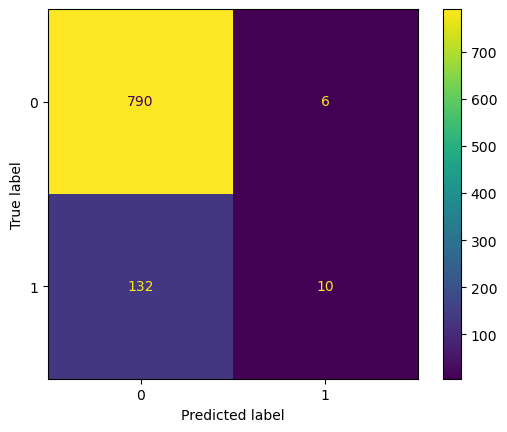

In [51]:
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

In [52]:
accuracy_score(y_test, y_pred)

0.8528784648187633

In [53]:
y_pred_prob = LR.predict_proba(X_test)
y_pred_prob

array([[0.97456365, 0.02543635],
       [0.77770906, 0.22229094],
       [0.97685885, 0.02314115],
       ...,
       [0.8732486 , 0.1267514 ],
       [0.86256937, 0.13743063],
       [0.93793074, 0.06206926]])